In [2]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import time

%matplotlib notebook

In [3]:
def normalize(X):
    m = X.shape[0]
    mean = np.mean(X)
    sd = np.std(X)
    X = (X-mean)/sd
    return X

X = np.array(pd.read_csv("ass1_data/data/q1/linearX.csv",header=None))
Y = np.array(pd.read_csv("ass1_data/data/q1/linearY.csv",header=None))
X = normalize(X)
X = np.append(np.ones(X.shape),X,axis=1)
print(X.shape)
print(Y.shape)

(100, 2)
(100, 1)


In [4]:
param = np.zeros((2,1))

In [5]:
def error(p):
    return np.sum((Y-np.dot(X,p))**2)/(2*X.shape[0])

epsilon = 1e-12

def batch_grad_desc(alpha,stepSize,init):
    st = time.time()*1000
    theta0 = []
    theta1 = []
    J = [] 
    for i in range(200000):
        hyp = np.dot(X,init)
        grad = (np.reshape(np.sum(((Y-hyp)*(-X)),axis=0)/X.shape[0],(param.shape)))
        prev=init
        init = init-alpha*grad
        if(isnan(init[0][0]) or isnan(init[1][0]) or isinf(init[0][0]) or isinf(init[1][0])):
            init=prev
            break
        if(init[0][0]>1e15 or init[1][0]>1e15):
            init=prev
            break
        if(time.time()*1000-st >= 0.2 and abs(prev[0][0]-init[0][0])>epsilon and abs(prev[1][0]-init[1][0])>epsilon):
            theta0.append(init[0][0])
            theta1.append(init[1][0])
            J.append(error(init))
            st=time.time()*1000
    return init,theta0,theta1,J

In [6]:
st=time.time()
updatedParam,t0,t1,J = batch_grad_desc(0.1,1,param)
print(updatedParam)
print(time.time()-st)

[[0.9966201]
 [0.0013402]]
9.88114595413208


In [7]:
optimal = updatedParam

In [18]:
error(np.array([[1.77922],[-0.93179]]))

0.7415984778905882

In [9]:
yPred = updatedParam[0]+updatedParam[1]*np.delete(X,0,axis=1)
# yPred2 = stParam[0]+stParam[1]*np.delete(X,0,axis=1)
print(yPred.shape)
# print(yPred2.shape)

(100, 1)


<IPython.core.display.Javascript object>


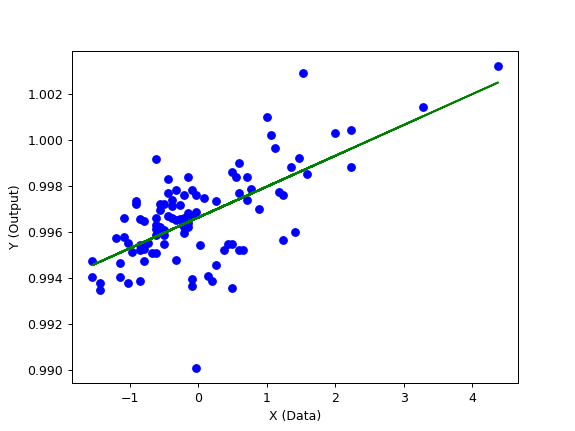

In [10]:
plt.figure(0)
plt.plot(np.delete(X,0,axis=1),Y,'o',color='blue')
plt.plot(np.delete(X,0,axis=1),yPred,color='green')
# plt.plot(np.delete(X,0,axis=1),yPred2,color='red')
plt.xlabel("X (Data)")
plt.ylabel("Y (Output)")
plt.show()

In [11]:
print(mean_squared_error(Y, yPred))
# print(mean_squared_error(Y, yPred2))

2.3895796219672837e-06


In [12]:
# ols=linear_model.LinearRegression(fit_intercept=True, normalize=False)
# LR=ols.fit(np.delete(X,0,axis=1),Y)
# YP=LR.predict(np.delete(X,0,axis=1))
# print(mean_squared_error(Y, YP))
# print(LR.intercept_)
# print(LR.coef_)

In [13]:
def calculateGridError(t0,t1):
    temp = np.zeros(t0.shape)
    for i in range(t0.shape[0]):
        for j in range(t1.shape[1]):
            temp[i][j] = np.sum((Y-t0[i][j]-t1[i][j]*X)**2)/(2*X.shape[0])
    return temp

In [14]:
k = 0.8
theta_0 = np.linspace(optimal[0][0]-k, optimal[0][0]+k, 100)
theta_1 = np.linspace(optimal[1][0]-k, optimal[1][0]+k, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0, theta_1)

In [15]:
J_mat = calculateGridError(Theta_0, Theta_1)

In [16]:
def animate(i,ax1):
    line = ax1.plot(t0[:i],t1[:i], J[:i],label='Gradient Descent Movement',color='red',lw='1')

<IPython.core.display.Javascript object>


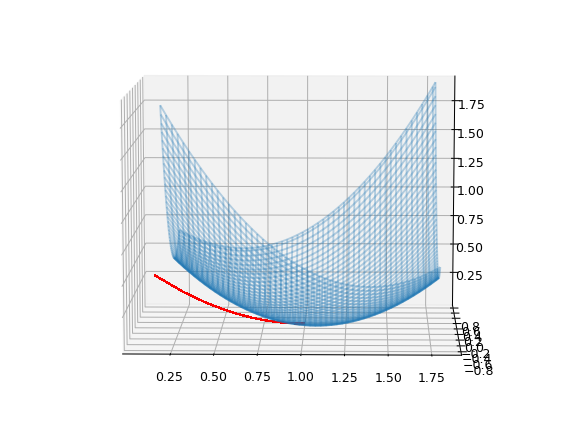

In [19]:
fig1 = plt.figure(1)
ax1 = Axes3D(fig1)
ax1.plot_wireframe(Theta_0, Theta_1, J_mat,alpha=0.3, label='Cost Function')
    
anim = FuncAnimation(fig1, animate,frames=len(J),fargs=[ax1], interval=200,save_count=len(J),repeat=True)

In [30]:
# ax.plot(t0,t1,J,color='green')

In [31]:
# def animate(i):
#     line = ax1.plot(t0[:i],t1[:i], J[:i],label='Gradient Descent Movement',color='red',lw='1')
    
# anim = FuncAnimation(fig, animate,frames=len(J), interval=200,save_count=len(J),repeat=True)


In [281]:
k = 4000
theta_0 = np.linspace(optimal[0][0]-k, optimal[0][0]+k, 1e3)
theta_1 = np.linspace(optimal[1][0]-k, optimal[1][0]+k, 1e3)
Theta_0, Theta_1 = np.meshgrid(theta_0, theta_1)
J_mat = calculateGridError(Theta_0, Theta_1)

<IPython.core.display.Javascript object>


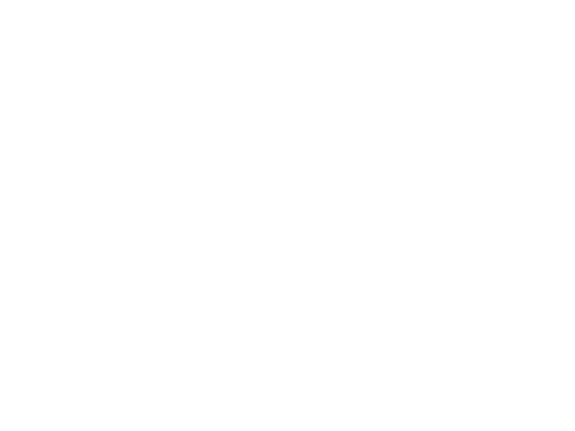

<IPython.core.display.Javascript object>


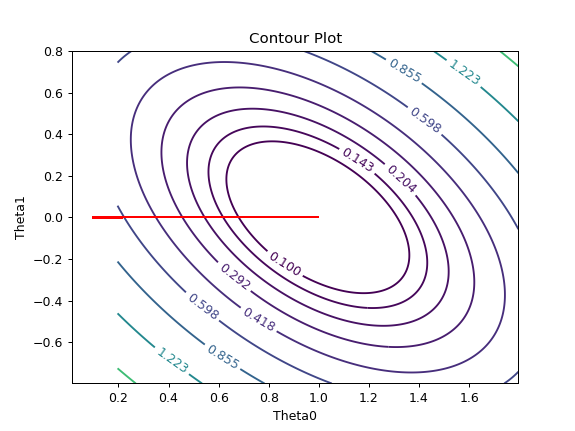

In [34]:
plt.figure(2)
fig2, ax2 = plt.subplots()
# lev=[]
# for i in J:
#     if i>0.01:
#         lev.append(i)
# m=max(lev)
# for i in np.geomspace(m+0.1,10,10):
#     lev.append(i)

lev=np.geomspace(0.1,2.5,10)
cp = ax2.contour(Theta_0,Theta_1,J_mat,levels=sorted(lev))
# ax2.contour(Theta_0,Theta_1,J_mat)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.set_title('Contour Plot')
ax2.set_xlabel('Theta0')
ax2.set_ylabel('Theta1')
plt.show()

def animate(i):
    line = ax2.plot(t0[:i],t1[:i],label='Gradient Descent Movement',color='red',lw='1')
    
anim = FuncAnimation(fig2, animate,frames=len(J), interval=200,save_count=len(J),repeat=True)